In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# Load the reference image
reference_img = cv2.imread('/home/ramez/Politechnika_Slaska_MSc/Thesis/Competition/Data/ops_sat_train_all_augmented/Mountain/Mountain_001.png')

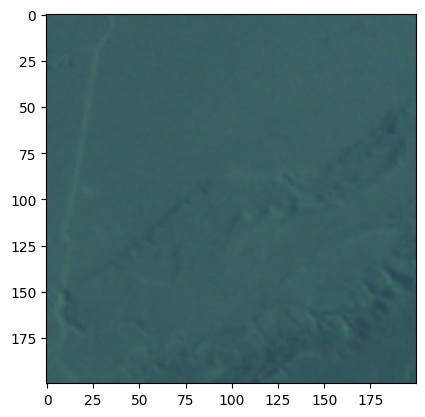

In [4]:
plt.imshow(cv2.cvtColor(reference_img, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
# Load the image to be color-corrected
input_img = cv2.imread('/home/ramez/Politechnika_Slaska_MSc/Thesis/Competition/Data/ops_sat_train_all_augmented/Mountain/Mountain_001_1.png')

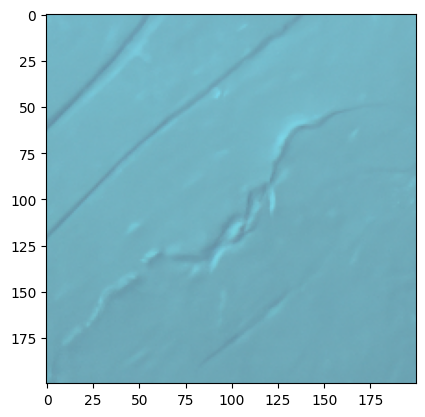

In [6]:
plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
# Convert the reference image to the LAB color space
reference_img_lab = cv2.cvtColor(reference_img, cv2.COLOR_BGR2LAB)

In [8]:
# Convert the input image to the LAB color space
input_img_lab = cv2.cvtColor(input_img, cv2.COLOR_BGR2LAB)

In [9]:
# Calculate the mean and standard deviation of the reference image in each channel
reference_img_mean, reference_img_std = cv2.meanStdDev(reference_img_lab)
reference_img_mean = np.squeeze(reference_img_mean)
reference_img_std = np.squeeze(reference_img_std)

In [10]:
print("Reference Image mean",reference_img_mean)
print("Reference Image Standard Deviation",reference_img_std)

Reference Image mean [ 95.943125 115.564975 121.872275]
Reference Image Standard Deviation [3.91726821 1.37865088 1.47995315]


In [11]:
# Calculate the mean and standard deviation of the input image in each channel
input_img_mean, input_img_std = cv2.meanStdDev(input_img_lab)
input_img_mean = np.squeeze(input_img_mean)
input_img_std = np.squeeze(input_img_std)

In [12]:
print("Reference Image mean",input_img_mean)
print("Reference Image Standard Deviation",input_img_std)

Reference Image mean [173.842    111.930225 113.806   ]
Reference Image Standard Deviation [6.30432677 1.2816616  0.70207834]


In [13]:
# Apply color correction to the input image using the mean and standard deviation of the reference image and input image in each channel
for i in range(3):
    input_img_lab[:, :, i] = ((input_img_lab[:, :, i] - input_img_mean[i]) * (reference_img_std[i] / input_img_std[i])) + reference_img_mean[i]

In [14]:
# Convert the color-corrected image back to the BGR color space
output_img = cv2.cvtColor(input_img_lab, cv2.COLOR_LAB2BGR)

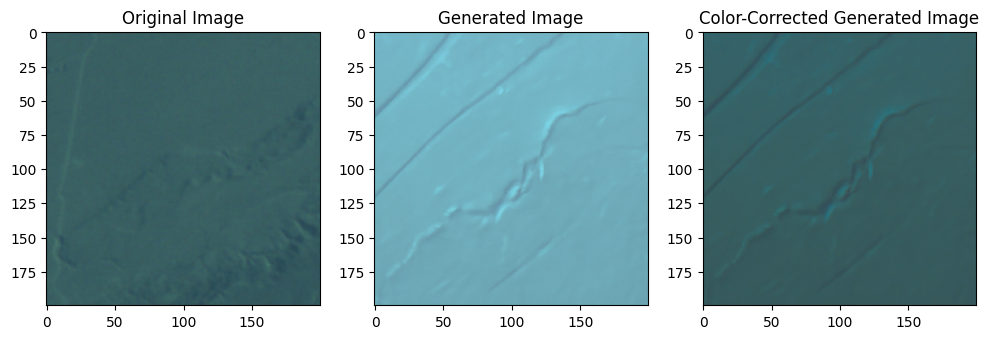

In [15]:
# Create a grid of subplots with 1 row and 3 columns
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# Plot each image in a separate subplot
ax[0].imshow(cv2.cvtColor(reference_img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
ax[1].set_title('Generated Image')
ax[2].imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
ax[2].set_title('Color-Corrected Generated Image')

# Show the plot
plt.show()